In [1]:
# Prosessing libs
import pandas as pd
import os
import numpy as np
from fastparquet import ParquetFile
import glob

# PySpark
from pyspark.sql import SparkSession
from pyspark.sql import functions as psf

# Visualisation libs
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime


In [2]:
# change memory allocation for pyarrow
# os.environ['PYARROW_MEMORY_POOL_MAX_CHUNKSIZE'] = '3000000000'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = "notebook"
# os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
# os.environ['PYSPARK_PYTHON'] = sys.executable

## Get the path of all files

In [2]:
start_time = datetime.now()
print("Start time: ", start_time)
os.getcwd()

Start time:  2023-09-17 21:55:21.669589


'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats\\notebooks-contributions'

In [3]:
os.chdir("..")


In [4]:
home_dir = os.getcwd()
parquet_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data-test")
parquet_dir

parquet_dir = r"E:\Rafael-data\type=way\state=latest"


In [5]:
files = glob.glob(f'{parquet_dir}\\**\\*.parquet', recursive=True)
files


['E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_0.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_1.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_10.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_11.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_2.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_3.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_4.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_5.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_6.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_7.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_8.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2017\\data_9.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2018\\data_0.parquet',
 'E:\\Rafael-data\\type=way\\state=latest\\year=2018\\data_1.parquet',
 'E:

In [6]:
# os.chdir("..")
# home_dir = os.getcwd()
# parquet_dir_node = os.path.join(home_dir, r"oshdb-contributions-parquet-data\type=node")
# parquet_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data")
# duckdb_dir = os.path.join(home_dir, r"notebooks-contributions\duckdb")
# test_dir = os.path.join(home_dir, r"oshdb-contributions-parquet-data\type=node\year=2023")


In [7]:
# files = glob.glob(f'{parquet_dir}\\**\\*.parquet', recursive=True)
# files


In [8]:
# files_location_lst = []

# for (path_dir, folder_names, file_names) in os.walk(parquet_dir_node):
#     for file_name in file_names:
#         if file_name.endswith(".parquet"):
#             file_location = os.path.join(path_dir, file_name)
#             files_location_lst.append(file_location)
# files_location_lst


## Load the all data with Apache PySpark

In [9]:
spark = SparkSession.builder.appName("ReadParquetFiles").getOrCreate()

df = spark.read.parquet(*files)

# df.show()


In [10]:
# df.count()

In [11]:
# spark.stop()

In [12]:
# df.describe().show()

In [13]:
# df.na.drop(how="any",subset=["building_area"]).show()

### Data transformation, Data types conversion

In [14]:
# Cast the 'changeset_timestamp' column to a LongType
df = df.withColumn('changeset_timestamp', psf.col(
    'changeset_timestamp').cast('long'))

# Use the 'changeset_timestamp' column to create a new 'datetime' column
df = df.withColumn('datetime', psf.from_unixtime(
    psf.col('changeset_timestamp')/1000, 'yyyy-MM-dd HH:mm:ss.SSSSSS'))

# Show the resulting DataFrame
# df.show()


In [15]:
# Use the 'changeset_timestamp' column to create a new 'datetime' column
df = df.withColumn('y_m', psf.from_unixtime(
    psf.col('changeset_timestamp')/1000, 'yyyy-MM'))

# Create a new column called 'year' containing the year from the 'datetime' column
df = df.withColumn('year', psf.year('datetime'))



# Show the resulting DataFrame
# df.show()


In [16]:
# Convert the 'tags' column to a string for filtering
df = df.withColumn("tags_str", df.tags.cast("string"))
df = df.withColumn("road_str", df.road.cast("string"))

In [17]:
str(df.columns)

"['contrib_id', 'valid_from', 'valid_to', 'osm_id', 'osm_version', 'changeset_id', 'changeset_timestamp', 'hashtags', 'editor', 'user_id', 'tags', 'tags_delta', 'primary_feature', 'building', 'road', 'is_area', 'area', 'area_delta', 'length', 'length_delta', 'contrib_type', 'country_iso_a3', 'country', 'centroid', 'geometry_type', 'geometry_valid', 'geometry', 'state', 'type', 'datetime', 'y_m', 'year', 'tags_str', 'road_str']"

In [18]:
# df.count()

In [19]:
# df.groupBy("road").count().show()

In [20]:
# df.groupBy("state").count().show()

In [21]:
df = df.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [22]:
# df.groupBy("building").count().show()

In [23]:
df.columns

['contrib_id',
 'valid_from',
 'valid_to',
 'osm_id',
 'osm_version',
 'changeset_id',
 'changeset_timestamp',
 'hashtags',
 'editor',
 'user_id',
 'tags',
 'tags_delta',
 'primary_feature',
 'building',
 'road',
 'is_area',
 'area',
 'area_delta',
 'length',
 'length_delta',
 'contrib_type',
 'country_iso_a3',
 'country',
 'centroid',
 'geometry_type',
 'geometry_valid',
 'geometry',
 'state',
 'type',
 'datetime',
 'y_m',
 'year',
 'tags_str',
 'road_str',
 'hashtags_un']

In [24]:
# df.count()

In [25]:
# df.show()

In [26]:
# Try to identify Vietnam abbretiation

#df_V = df.filter(psf.col("country").startswith("V"))
# df_V.groupBy("country").count().show()

# Create temporary view
#df_V.createOrReplaceTempView("TAB")
# spark.sql("SELECT DISTINCT * FROM TAB").show()
#spark.sql("SELECT DISTINCT country FROM TAB").show()


In [27]:
# Get the last edit
# max_date = df.selectExpr("max(datetime)").collect()
# max_date[0]


# Number of created buildings

### Data wrangling – buildings
- select all buildings (col building) with 1 value and NULL value
- use groupBy to count the last record of the users → the number of buildings

In [29]:
# df.groupBy("building").count().show()

In [30]:
df_blds_created = df.filter(psf.col('building').isin([1]) | psf.col('building').isNull()) # | psf.col('building').isNull()


In [31]:
# df_blds_created.show()

In [32]:
# df_blds = df.filter(df.building.contains(1) | df.building.contains(0) | df.building.isNull())


In [33]:
# df_blds.show()

In [34]:
# df_blds.groupBy("building").count().show()


In [35]:
df_blds_created = df_blds_created.groupBy("osm_id", "editor", "country", "tags_str", "hashtags", "year").agg(psf.last("datetime").alias("datetime"))

In [36]:
# df_blds.show()

In [37]:
# df_blds.show()

In [38]:
df_blds_created = df_blds_created.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


## Building filter

### Filter for numbers of  created buildings
- column tag_str contains 'building' to filter all buildings

In [39]:
df_all_blds_created = df_blds_created.filter(df_blds_created.tags_str.contains("building"))
# df_all_blds_created.show()

In [40]:
# World
df_all_blds_created_world = df_all_blds_created.groupBy("year").count().withColumnRenamed("count", "df_all_blds_created_world").toPandas()
df_all_blds_created_world


,year,df_all_blds_created_world
0,2018,49162957
1,2023,18980027
2,2022,52291372
3,2019,35939305
4,2020,45508390
5,2017,37991492
6,2021,54107309


In [41]:
# Selected countries
df_all_blds_created_country = df_all_blds_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_blds_created_country = df_all_blds_created_country.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_created_country").toPandas()
df_all_blds_created_country

,year,country,df_all_blds_created_country
0,2018,VNM,166872
1,2022,USA,8780802
2,2017,NGA,361751
3,2022,NGA,2873263
4,2019,NGA,826906
5,2019,VNM,70368
6,2022,CZE,101843
7,2023,DEU,590903
8,2018,NGA,647450
9,2017,USA,4961834


In [42]:
# # USA - USA
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_created_country_USA")
# df_all_blds_created_country_USA = df_all_blds_created_country.filter("country == 'USA' OR country == 'CZE'").toPandas()  # psf.col("country") == "USA" | psf.col("country") == "CZE"
# df_all_blds_created_country_USA


In [43]:
# # Nigeria - NGA
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_NGA = df_all_blds_created_country.filter(df_all_blds_created_country.country == "NGA").toPandas()
# df_all_blds_created_country_NGA

In [44]:
# # Vietnam - VNM
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_VNM = df_all_blds_created_country.filter(df_all_blds_created_country.country == "VNM").toPandas()
# df_all_blds_created_country_VNM

In [45]:
# # Germany - DEU
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_DEU = df_all_blds_created_country.filter(df_all_blds_created_country.country == "DEU").toPandas()
# df_all_blds_created_country_DEU

In [46]:
# # Czechia - CZE
# df_all_blds_created_country = df_all_blds_created.groupBy("year", "country").count()
# df_all_blds_created_country_CZE = df_all_blds_created_country.filter(df_all_blds_created_country.country == "CZE").toPandas()
# df_all_blds_created_country_CZE


## AI created buildings filter

### Filter 1
- column tag_str contains 'microsoft/BuildingFootprints' or 'esri/Google_Africa_Buildings'

In [47]:
df_ai_blds_created = df_all_blds_created.filter(
    df_all_blds_created.tags_str.contains("microsoft/BuildingFootprints")
    | df_all_blds_created.tags_str.contains("esri/Google_Africa_Buildings")
    )


In [48]:
# World
df_ai_blds_created_world = df_ai_blds_created.groupBy("year").count().withColumnRenamed("count", "df_ai_blds_created_world").toPandas()
df_ai_blds_created_world


,year,df_ai_blds_created_world
0,2023,2818021
1,2022,6293603
2,2019,10284
3,2020,2083223
4,2021,2787888


In [49]:
# Selected countries
df_ai_blds_created_country = df_ai_blds_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_ai_blds_created_country = df_ai_blds_created_country.groupBy("year", "country").count().withColumnRenamed("count", "df_ai_blds_created_country").toPandas()
df_ai_blds_created_country

,year,country,df_ai_blds_created_country
0,2022,USA,3165885
1,2022,NGA,858169
2,2022,CZE,60
3,2023,DEU,2771
4,2023,USA,1416842
5,2019,USA,10284
6,2021,USA,2454946
7,2021,NGA,29
8,2022,VNM,68
9,2023,NGA,66354


In [50]:
# # USA - USA
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_USA = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "USA").toPandas()
# df_ai_blds_created_country_USA

In [51]:
# # Nigeria - NGA
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_NGA = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "NGA").toPandas()
# df_ai_blds_created_country_NGA

In [52]:
# # Vietnam - VNM
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_VNM = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "VNM").toPandas()
# df_ai_blds_created_country_VNM


In [53]:
# # Germany - DEU
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_DEU = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "DEU").toPandas()
# df_ai_blds_created_country_DEU

In [54]:
# # Czechia - CZE
# df_ai_blds_created_country = df_ai_blds_created.groupBy("year", "country").count()
# df_ai_blds_created_country_CZE = df_ai_blds_created_country.filter(df_ai_blds_created_country.country == "CZE").toPandas()
# df_ai_blds_created_country_CZE

# Number of edited buildings

In [55]:
df_blds_edited = df.filter(psf.col('building').isin([0]) | psf.col('building').isNull()) # | psf.col('building').isNull()


In [56]:
# df_blds = df.filter(df.building.contains(1) | df.building.contains(0) | df.building.isNull())


In [57]:
# df_blds.show()

In [58]:
# df_blds.groupBy("building").count().show()


In [59]:
df_blds_edited = df_blds_edited.groupBy("osm_id", "editor", "country", "tags_str", "hashtags", "year").agg(psf.last("datetime").alias("datetime"))


In [60]:
# df_blds.show()

In [61]:
# df_blds.show()

In [62]:
df_blds_edited = df_blds_edited.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


## Building filter

### Filter for numbers of  edited buildings
- column tag_str contains 'building' to filter all buildings

In [63]:
df_all_blds_edited = df_blds_edited.filter(df_blds_edited.tags_str.contains("building"))


In [64]:
# World
df_all_blds_edited_world = df_all_blds_edited.groupBy("year").count().withColumnRenamed("count", "df_all_blds_edited_world").toPandas()
df_all_blds_edited_world

,year,df_all_blds_edited_world
0,2018,12477319
1,2023,10891364
2,2022,28914498
3,2019,17136762
4,2020,21364175
5,2017,11267476
6,2021,29564306


In [65]:
# Selected countries
df_all_blds_edited_country = df_all_blds_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_blds_edited_country = df_all_blds_edited_country.groupBy("year", "country").count().withColumnRenamed("count", "df_all_blds_edited_country").toPandas()
df_all_blds_edited_country

,year,country,df_all_blds_edited_country
0,2018,VNM,50278
1,2022,USA,2781438
2,2017,NGA,31970
3,2022,NGA,974374
4,2019,NGA,61177
5,2019,VNM,30482
6,2022,CZE,258890
7,2023,DEU,1356531
8,2018,NGA,73748
9,2017,USA,809578


In [66]:
# # USA - USA
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_USA = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "USA").toPandas()
# df_all_blds_edited_country_USA

In [67]:
# # Nigeria - NGA
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_NGA = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "NGA").toPandas()
# df_all_blds_edited_country_NGA

In [68]:
# # Vietnam - VNM
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_VNM = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "VNM").toPandas()
# df_all_blds_edited_country_VNM


In [69]:
# # Germany - DEU
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_DEU = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "DEU").toPandas()
# df_all_blds_edited_country_DEU

In [70]:
# # Czechia - CZE
# df_all_blds_edited_country = df_all_blds_edited.groupBy("year", "country").count()
# df_all_blds_edited_country_CZE = df_all_blds_edited_country.filter(df_all_blds_edited_country.country == "CZE").toPandas()
# df_all_blds_edited_country_CZE

## AI edited buildings filter

### Filter 1
- column tag_str contains 'microsoft/BuildingFootprints' or 'esri/Google_Africa_Buildings'

In [71]:
df_ai_blds_edited = df_all_blds_edited.filter(
    df_all_blds_edited.tags_str.contains("microsoft/BuildingFootprints")
    | df_all_blds_edited.tags_str.contains("esri/Google_Africa_Buildings")
    )


In [72]:
# World
df_ai_blds_edited_world = df_ai_blds_edited.groupBy("year").count().withColumnRenamed("count", "df_ai_blds_edited_world").toPandas()
df_ai_blds_edited_world


,year,df_ai_blds_edited_world
0,2023,464308
1,2022,933020
2,2019,16
3,2020,78853
4,2021,207966


In [73]:
# Selected countries
df_ai_blds_edited_country = df_ai_blds_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_ai_blds_edited_country = df_ai_blds_edited_country.groupBy("year", "country").count().withColumnRenamed("count", "df_ai_blds_edited_country").toPandas()
df_ai_blds_edited_country

,year,country,df_ai_blds_edited_country
0,2022,USA,555963
1,2022,NGA,195584
2,2023,DEU,338
3,2023,USA,244275
4,2019,USA,16
5,2021,USA,170464
6,2023,NGA,2739
7,2020,USA,60426
8,2022,DEU,450
9,2023,VNM,29


In [74]:
# # USA - USA
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_USA = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "USA").toPandas()
# df_ai_blds_edited_country_USA


In [75]:
# # Nigeria - NGA
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_NGA = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "NGA").toPandas()
# df_ai_blds_edited_country_NGA

In [76]:
# # Vietnam - VNM
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_VNM = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "VNM").toPandas()
# df_ai_blds_edited_country_VNM

In [77]:
# # Germany - DEU
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_DEU = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "DEU").toPandas()
# df_ai_blds_edited_country_DEU

In [78]:
# # Czechia - CZE
# df_ai_blds_edited_country = df_ai_blds_edited.groupBy("year", "country").count()
# df_ai_blds_edited_country_CZE = df_ai_blds_edited_country.filter(df_ai_blds_edited_country.country == "CZE").toPandas()
# df_ai_blds_edited_country_CZE

# Length of created roads

### Data wrangling – roads
- select distinct osm_id
- remove all -1
- then use groupby (osm_id) and function last (time column)

In [28]:
df_roads_created = df.filter(psf.col('road').isin([1]) | psf.col('road').isNull()) # | psf.col('road').isNull()

In [29]:
# df_roads = df.filter(~psf.col('road').isin([-1, 0]))

In [30]:
df_roads_created = df_roads_created.groupBy(
    "osm_id", "editor", "length", "country", "tags_str", "hashtags", "year", "road").agg(psf.last("datetime").alias("datetime"))


In [31]:
# df_roads.show()

In [32]:
df_roads_created = df_roads_created.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [33]:
# df_roads.groupBy("hashtags_un").count().show()


In [34]:
# df_roads.show()

In [35]:
df_all_roads_created = df_roads_created.filter(
    df_roads_created.tags_str.contains("highway"))


## Road filter

### Filter for the length of all roads
- column tag_str contains motorway, trunk, motorway_link, trunk_link, primary, primary_link, secondary, secondary_link, tertiary, tertiary_link, unclassified, residential

In [36]:
df_main_roads_created = df_all_roads_created.filter(
    df_all_roads_created.tags_str.contains("motorway")\
    | df_all_roads_created.tags_str.contains("trunk")\
    | df_all_roads_created.tags_str.contains("motorway_link")\
    | df_all_roads_created.tags_str.contains("trunk_link")\
    | df_all_roads_created.tags_str.contains("primary")\
    | df_all_roads_created.tags_str.contains("primary_link")\
    | df_all_roads_created.tags_str.contains("secondary")\
    | df_all_roads_created.tags_str.contains("secondary_link")\
    | df_all_roads_created.tags_str.contains("tertiary")\
    | df_all_roads_created.tags_str.contains("tertiary_link")\
    | df_all_roads_created.tags_str.contains("unclassified")\
    | df_all_roads_created.tags_str.contains("residential")\
    )


#### All roads

In [37]:
# World – all roads
df_all_roads_created_world = df_all_roads_created.groupBy("year").sum().withColumnRenamed("sum(length)", "df_all_roads_created_world").toPandas()
df_all_roads_created_world


,year,sum(osm_id),df_all_roads_created_world,sum(year),sum(road)
0,2018,5198320232612727,2879284901,20115401802,2631780
1,2023,9768484559110054,3140933945,23059800722,1693878
2,2022,21344832197560253,7068196446,52689059646,4660558
3,2019,8811207964335734,4155192367,29215325724,3333288
4,2020,16286002434902777,6204721540,46400329200,5363702
5,2017,2968126735182474,2143822050,13741342971,1500892
6,2021,21655248820781186,7346844414,56147120871,5589362


In [38]:
# Selected countries – all roads
df_all_roads_created_country = df_all_roads_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_roads_created_country = df_all_roads_created_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_all_roads_created_country").toPandas()
df_all_roads_created_country

,year,country,sum(osm_id),df_all_roads_created_country,sum(year),sum(road)
0,2018,VNM,32693096768545,5677633,111742714,31292
1,2022,USA,3913415727989552,930185901,9159548790,412030
2,2017,NGA,82495638512021,69326458,321477528,136267
3,2022,NGA,107245442362915,32230631,211299000,61131
4,2019,NGA,26888143465239,17140386,80745867,16760
5,2019,VNM,42992531589880,7162284,128291298,44583
6,2022,CZE,156638044089959,52990463,478860150,14173
7,2023,DEU,640972225499412,186306217,2179141209,39516
8,2018,NGA,204887389089197,71753352,726173264,332490
9,2017,USA,425678651861017,243330682,2069179790,106843


#### Main roads

In [39]:
# World – main roads
df_main_roads_created_world = df_main_roads_created.groupBy("year").sum().withColumnRenamed("sum(length)", "df_main_roads_created_world").toPandas()
df_main_roads_created_world


,year,sum(osm_id),df_main_roads_created_world,sum(year),sum(road)
0,2018,1559676837229640,849477809,5347869512,2631780
1,2023,1959771012182396,608504418,3606543710,1693878
2,2022,4938041745584607,1555578362,9655102572,4660558
3,2019,2308271151569792,1070935637,6773516853,3333288
4,2020,4332014246852706,1659986169,10908258560,5363702
5,2017,759936853422110,590285275,3076889126,1500892
6,2021,5247466885273880,1776437139,11440775908,5589362


In [40]:
# Selected countries – main roads
df_main_roads_created_country = df_main_roads_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_roads_created_country = df_main_roads_created_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_main_roads_created_country").toPandas()
df_main_roads_created_country

,year,country,sum(osm_id),df_main_roads_created_country,sum(year),sum(road)
0,2018,VNM,18890373478681,3265117,63161382,31292
1,2022,USA,434253838678629,110214656,854017986,412030
2,2017,NGA,71045795755840,54526988,274860624,136267
3,2022,NGA,63667775601165,16852816,123807060,61131
4,2019,NGA,11886514765430,5617362,33913143,16760
5,2019,VNM,30810012624783,5309951,90085761,44583
6,2022,CZE,15131756391442,2648212,31387506,14173
7,2023,DEU,51322814468849,5830879,100470272,39516
8,2018,NGA,189285434663957,59616012,670970874,332490
9,2017,USA,51562212254149,34108541,216424100,106843


In [41]:
# # USA - USA
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "USA").show()

In [42]:
# # Nigeria - NGA
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "NGA").toPandas()

In [43]:
# # Vietnam - VNM
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "VNM").show()

In [44]:
# # Germany - DEU
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "DEU").toPandas()

In [45]:
# # Czechia - CZE
# df_all_roads_created_country = df_all_roads_created.groupBy("year", "country").count()
# df_all_roads_created_country.filter(df_all_roads_created_country.country == "CZE").show()

## AI road filter

### Filter 1
- column tags contains “#mapwithai” or “#nsroadimport” or "#MapWithAI"

In [46]:
# df_roads_f1_created = df_all_roads_created.filter(\
#     df_all_roads_created.tags_str.contains("mapwithai")\
#     | df_all_roads_created.tags_str.contains("MapWithAI")\
#     | df_all_roads_created.tags_str.contains("nsroadimport")\
#     )


In [47]:
# df_roads_f1_created.groupBy("year").sum().show()


### Filter 2
- column tags_str contains (#nsroadimport" or "mapwithai" or “MapWithAI") and "highway"
OR
- column hashtags_un contains (#nsroadimport" or "mapwithai") and it is highway (from column tags_str ???)

In [48]:
# df_roads_f2_created = df_all_roads_created.filter(\
#     (
#         (df_all_roads_created.tags_str.contains("mapwithai")\
#         | df_all_roads_created.tags_str.contains("MapWithAI")\
#         | df_all_roads_created.tags_str.contains("nsroadimport"))\
#         & (df_all_roads_created.tags_str.contains("highway")))\
#         |\
#         (df_all_roads_created.hashtags_un.contains("mapwithai")\
#         | df_all_roads_created.hashtags_un.contains("nsroadimport")\
#         & (df_all_roads_created.tags_str.contains("highway")))\
#     )


In [49]:
# df_roads_f2_created.groupBy("year").sum().show()


### Filter 3
3_1 – column editor contains RapiD

3_2 – column editor contains RapiD or column tags_str/hashtags_un contains mapwithai

3_3 – column editor contains RapiD and column tags_str/hashtags_un contains mapwithai

#### F3_1

In [50]:
# df_roads_f3_1_created = df_all_roads_created.filter(df_all_roads_created.editor.contains("RapiD"))


In [51]:
# df_roads_f3_1_created.groupBy("year").sum().show()


#### F3_2

In [52]:
df_all_ai_roads_f3_2_created = df_all_roads_created.filter(
    df_all_roads_created.editor.contains("RapiD")\
    | df_all_roads_created.tags_str.contains("mapwithai")\
    | df_all_roads_created.tags_str.contains("MapWithAI")\
    | df_all_roads_created.tags_str.contains("nsroadimport")\
    | df_all_roads_created.hashtags_un.contains("#mapwithai")\
    | df_all_roads_created.hashtags_un.contains("#nsroadimport")\
    | df_all_roads_created.hashtags_un.contains("#MapWithAI")\
)


In [53]:
df_main_ai_roads_f3_2_created = df_main_roads_created.filter(
    df_main_roads_created.editor.contains("RapiD")
    | df_main_roads_created.tags_str.contains("mapwithai")
    | df_main_roads_created.tags_str.contains("MapWithAI")
    | df_main_roads_created.tags_str.contains("nsroadimport")
    | df_main_roads_created.hashtags_un.contains("#mapwithai")
    | df_main_roads_created.hashtags_un.contains("#nsroadimport")
    | df_main_roads_created.hashtags_un.contains("#MapWithAI")
)


#### All AI roads 

In [54]:
# World
df_all_ai_roads_created_world = df_all_ai_roads_f3_2_created.groupBy("year").sum().withColumnRenamed("sum(length)", "df_all_ai_roads_created_world").toPandas()
df_all_ai_roads_created_world


,year,sum(osm_id),df_all_ai_roads_created_world,sum(year),sum(road)
0,2018,100827560866722,57768799,345435186,107491
1,2023,578930960570241,166659796,1072720026,195445
2,2022,1881258370557883,488173688,3734308458,1115271
3,2019,139039482101952,79371331,393071034,113269
4,2020,2196672324277680,683366021,5512192160,1023906
5,2017,62203187003612,35461990,242749984,85009
6,2021,2638404822171098,725413368,5827486807,1339105


In [55]:
# Selected countries
df_all_ai_roads_created_country = df_all_ai_roads_f3_2_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_ai_roads_created_country = df_all_ai_roads_created_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_all_ai_roads_created_country").toPandas()
df_all_ai_roads_created_country

,year,country,sum(osm_id),df_all_ai_roads_created_country,sum(year),sum(road)
0,2022,USA,143656501080480,33689065,339194544,8506.0
1,2022,NGA,4085948451848,1478859,7873668,3161.0
2,2019,NGA,5525371383578,1894269,15822903,4501.0
3,2019,VNM,71640798748,15473,199881,85.0
4,2022,CZE,49532474680,14575,109188,8.0
5,2023,DEU,147364860379,44283,418761,5.0
6,2020,DEU,5910721344172,898779,14931840,25.0
7,2023,USA,45800012085063,11478202,96826849,1858.0
8,2019,USA,10163728717449,4493632,29582388,3350.0
9,2021,USA,584537334588932,161634364,1393901889,11541.0


#### Main AI roads

In [56]:
# World
df_main_ai_roads_created_world = df_main_ai_roads_f3_2_created.groupBy("year").sum().withColumnRenamed("sum(length)", "df_main_ai_roads_created_world").toPandas()
df_main_ai_roads_created_world


,year,sum(osm_id),df_main_ai_roads_created_world,sum(year),sum(road)
0,2018,64573305656102,23157742,216916838,107491
1,2023,221728797548710,47104564,396121607,195445
2,2022,1176700114032474,234957189,2256173886,1115271
3,2019,82084829979848,33191352,228710301,113269
4,2020,847495300925107,222971570,2069045600,1023906
5,2017,44529870516975,18280815,171465170,85009
6,2021,1277117636346221,260973775,2706889001,1339105


In [57]:
# Selected countries
df_main_ai_roads_created_country = df_main_ai_roads_f3_2_created.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_ai_roads_created_country = df_main_ai_roads_created_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_main_ai_roads_created_country").toPandas()
df_main_ai_roads_created_country

,year,country,sum(osm_id),df_main_ai_roads_created_country,sum(year),sum(road)
0,2022,USA,8189317752124,2499213,17379090,8506
1,2022,NGA,3366809114167,960916,6393564,3161
2,2019,NGA,3177198323166,728932,9087519,4501
3,2019,VNM,63294237826,14350,171615,85
4,2022,CZE,8785060942,1015,16176,8
5,2023,DEU,5665917775,1315,10115,5
6,2020,DEU,21963878358,1466,52520,25
7,2023,USA,2039341386655,659259,3829539,1858
8,2019,USA,2428599430665,1687846,6765669,3350
9,2021,USA,10117348089625,5112307,23494125,11541


In [58]:
# # USA - USA
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "USA").show()

In [59]:
# # Nigeria - NGA
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "NGA").toPandas()

In [60]:
# # Vietnam - VN
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "VNM").show()

In [61]:
# # Germany - DEU
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "DEU").toPandas()

In [62]:
# # Czechia - CZE
# df_roads_f3_2_created_country = df_roads_f3_2_created.groupBy("year", "country").count()
# df_roads_f3_2_created_country.filter(df_roads_f3_2_created_country.country == "CZE").show()

#### F3_3

In [63]:
# df_roads_f3_3_created = df_all_roads_created.filter(\
#     (df_all_roads_created.editor.contains("RapiD")\
#      & (df_all_roads_created.tags_str.contains("mapwithai")\
#         | df_all_roads_created.hashtags_un.contains("mapwithai")\
#         | df_all_roads_created.tags_str.contains("MapWithAI")\
#         | df_all_roads_created.hashtags_un.contains("MapWithAI")))\
#     )


In [64]:
# df_roads_f3_3_created.groupBy("year").sum().show()


# Length of edited roads

In [65]:
df_roads_edited = df.filter(psf.col('road').isin([0]) | psf.col('road').isNull()) #  | psf.col('road').isNull()

In [66]:
# df_roads = df.filter(~psf.col('road').isin([-1, 0]))

In [67]:
df_roads_edited = df_roads_edited.groupBy("osm_id", "editor", "length", "country", "tags_str", "hashtags", "year", "road").agg(psf.last("datetime").alias("datetime"))


In [68]:
# df_roads.show()

In [69]:
df_roads_edited = df_roads_edited.withColumn("hashtags_un", psf.concat_ws(",", psf.col("hashtags")))


In [70]:
# df_roads.groupBy("hashtags_un").count().show()


In [71]:
# df_roads.show()

In [72]:
df_all_roads_edited = df_roads_edited.filter(
    df_roads_edited.tags_str.contains("highway"))


## Edited roads filter

### Filter for the length of all edited roads
- column tag_str contains motorway, trunk, motorway_link, trunk_link, primary, primary_link, secondary, secondary_link, tertiary, tertiary_link, unclassified, residential

In [73]:
df_main_roads_edited = df_all_roads_edited.filter(
    df_all_roads_edited.tags_str.contains("motorway")\
    | df_all_roads_edited.tags_str.contains("trunk")\
    | df_all_roads_edited.tags_str.contains("motorway_link")\
    | df_all_roads_edited.tags_str.contains("trunk_link")\
    | df_all_roads_edited.tags_str.contains("primary")\
    | df_all_roads_edited.tags_str.contains("primary_link")\
    | df_all_roads_edited.tags_str.contains("secondary")\
    | df_all_roads_edited.tags_str.contains("secondary_link")\
    | df_all_roads_edited.tags_str.contains("tertiary")\
    | df_all_roads_edited.tags_str.contains("tertiary_link")\
    | df_all_roads_edited.tags_str.contains("unclassified")\
    | df_all_roads_edited.tags_str.contains("residential")\
    )


#### All roads

In [74]:
# World – all roads
df_all_roads_edited_world = df_all_roads_edited.groupBy("year").sum().withColumnRenamed("sum(length)", "df_all_roads_edited_world").toPandas()
df_all_roads_edited_world


,year,sum(osm_id),df_all_roads_edited_world,sum(year),sum(road)
0,2018,4927478382162798,4106076987,23798637240,0
1,2023,11279929407022769,7585282191,36065839677,0
2,2022,23210226572780831,15694718504,75838535268,0
3,2019,8874223740680360,6457956900,36068700084,0
4,2020,17005588394343877,10654019346,59380459340,0
5,2017,2690149190323949,2739057565,15735851404,0
6,2021,22792657032357632,14581742086,74312828846,0


In [75]:
# Selected countries – all roads
df_all_roads_edited_country = df_all_roads_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_roads_edited_country = df_all_roads_edited_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_all_roads_edited_country").toPandas()
df_all_roads_edited_country

,year,country,sum(osm_id),df_all_roads_edited_country,sum(year),sum(road)
0,2018,VNM,17803571185984,4140941,66850286,0
1,2022,USA,4136735969508470,2406311651,12753168510,0
2,2017,NGA,37754493727478,83924746,167402932,0
3,2022,NGA,106943582808438,106877152,291851436,0
4,2019,NGA,32253997544297,44967514,115670529,0
5,2019,VNM,28012401047561,7486317,94933380,0
6,2022,CZE,171703599544992,83622878,652072758,0
7,2023,DEU,762285257138474,304386500,3266449088,0
8,2018,NGA,131513761781448,150748250,542771370,0
9,2017,USA,424573255602501,558527384,3321482648,0


#### Main roads

In [77]:
# World – main roads
df_main_roads_edited_world = df_main_roads_edited.groupBy("year").sum().withColumnRenamed("sum(length)", "df_main_roads_edited_world").toPandas()
df_main_roads_edited_world


,year,sum(osm_id),df_main_roads_edited_world,sum(year),sum(road)
0,2018,1288834986779711,2076269895,9031104950,0
1,2023,3471215860095111,5052852664,16612582665,0
2,2022,6803436120805185,10182100420,32804578194,0
3,2019,2371286927914418,3373700170,13626891213,0
4,2020,5051600206293806,6109283975,23888388700,0
5,2017,481959308563585,1185520790,5071397559,0
6,2021,6384875096850326,9011334811,29606483883,0


In [78]:
# Selected countries – main roads
df_main_roads_edited_country = df_main_roads_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_roads_edited_country = df_main_roads_edited_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_main_roads_edited_country").toPandas()
df_main_roads_edited_country

,year,country,sum(osm_id),df_main_roads_edited_country,sum(year),sum(road)
0,2018,VNM,4000847896120,1728425,18268954,0
1,2022,USA,657574080197547,1586340406,4447637706,0
2,2017,NGA,26304650971297,69125276,120786028,0
3,2022,NGA,63365916046688,91499337,204359496,0
4,2019,NGA,17252368844488,33444490,68837805,0
5,2019,VNM,15829882082464,5633984,56727843,0
6,2022,CZE,30197311846475,33280627,204600114,0
7,2023,DEU,172635846107911,123911162,1187778151,0
8,2018,NGA,115911807356208,138610910,487568980,0
9,2017,USA,50456815995633,349305243,1468726958,0


In [79]:
# # World
# df_all_roads_edited.groupBy("year").sum().toPandas()

In [80]:
# # USA - USA
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "USA").show()

In [81]:
# # Nigeria - NGA
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "NGA").toPandas()

In [82]:
# # Vietnam - VN
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "VNM").show()

In [83]:
# # Germany - DEU
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "DEU").toPandas()

In [84]:
# # Czechia - CZE
# df_all_roads_edited_country = df_all_roads_edited.groupBy("year", "country").count()
# df_all_roads_edited_country.filter(df_all_roads_edited_country.country == "CZE").show()

## AI road filter

### Filter 1
- column tags contains “#mapwithai” or “#nsroadimport” or "#MapWithAI"

In [85]:
# df_roads_f1_edited = df_all_roads_edited.filter(\
#     df_all_roads_edited.tags_str.contains("mapwithai")\
#     | df_all_roads_edited.tags_str.contains("MapWithAI")\
#     | df_all_roads_edited.tags_str.contains("nsroadimport")\
#     )


In [86]:
# df_roads_f1_edited.groupBy("year").sum().show()


### Filter 2
- column tags_str contains (#nsroadimport" or "mapwithai" or “MapWithAI") and "highway"
OR
- column hashtags_un contains (#nsroadimport" or "mapwithai") and it is highway (from column tags_str ???)

In [87]:
# df_roads_f2_edited = df_all_roads_edited.filter(\
#     (\
#         (df_all_roads_edited.tags_str.contains("mapwithai")\
#          | df_all_roads_edited.tags_str.contains("MapWithAI")\
#          | df_all_roads_edited.tags_str.contains("nsroadimport"))\
#         & (df_all_roads_edited.tags_str.contains("highway")))\
#       |\
#     (df_all_roads_edited.hashtags_un.contains("mapwithai")\
#          | df_all_roads_edited.hashtags_un.contains("nsroadimport")\
#          & (df_all_roads_edited.tags_str.contains("highway"))))


In [88]:
# df_roads_f2_edited.groupBy("year").sum().show()


### Filter 3
3_1 – column editor contains RapiD

3_2 – column editor contains RapiD or column tags_str/hashtags_un contains mapwithai

3_3 – column editor contains RapiD and column tags_str/hashtags_un contains mapwithai

#### F3_1

In [89]:
# df_roads_f3_1_edited = df_all_roads_edited.filter(df_all_roads_edited.editor.contains("RapiD"))


In [90]:
# df_roads_f3_1_edited.groupBy("year").sum().show()


#### F3_2

In [91]:
df_all_ai_roads_f3_2_edited = df_all_roads_edited.filter(
    df_all_roads_edited.editor.contains("RapiD")\
    | df_all_roads_edited.tags_str.contains("mapwithai")\
    | df_all_roads_edited.tags_str.contains("MapWithAI")\
    | df_all_roads_edited.tags_str.contains("nsroadimport")\
    | df_all_roads_edited.hashtags_un.contains("#mapwithai")\
    | df_all_roads_edited.hashtags_un.contains("#nsroadimport")\
    | df_all_roads_edited.hashtags_un.contains("#MapWithAI")\
)


In [92]:
df_main_ai_roads_f3_2_edited = df_main_roads_edited.filter(
    df_all_roads_edited.editor.contains("RapiD")
    | df_all_roads_edited.tags_str.contains("mapwithai")
    | df_all_roads_edited.tags_str.contains("MapWithAI")
    | df_all_roads_edited.tags_str.contains("nsroadimport")
    | df_all_roads_edited.hashtags_un.contains("#mapwithai")
    | df_all_roads_edited.hashtags_un.contains("#nsroadimport")
    | df_all_roads_edited.hashtags_un.contains("#MapWithAI")
)


#### All AI roads 

In [93]:
# World
df_all_ai_roads_edited_world = df_all_ai_roads_f3_2_edited.groupBy("year").sum().withColumnRenamed("sum(length)", "df_all_ai_roads_edited_world").toPandas()
df_all_ai_roads_edited_world


,year,sum(osm_id),df_all_ai_roads_edited_world,sum(year),sum(road)
0,2018,44907398033595,57654178,182384822,0
1,2023,498114678598493,275301170,1077271776,0
2,2022,1386459931856239,832746855,3448059984,0
3,2019,72347102766645,70772002,227692725,0
4,2020,1830761014976918,883343437,5149163820,0
5,2017,21463497989510,28692834,96656657,0
6,2021,2120079357803116,1209966244,5303730510,0


In [94]:
# Selected countries
df_all_ai_roads_edited_country = df_all_ai_roads_f3_2_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_all_ai_roads_edited_country = df_all_ai_roads_edited_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_all_ai_roads_edited_country").toPandas()
df_all_ai_roads_edited_country

,year,country,sum(osm_id),df_all_ai_roads_edited_country,sum(year),sum(road)
0,2022,USA,161519777127093,71618669,497490858,0.0
1,2022,NGA,2015925895280,2788780,6375366,0.0
2,2019,NGA,3465071958076,1956672,10619940,0.0
3,2019,VNM,15601683382,3992,52494,0.0
4,2022,CZE,42293665864,24091,109188,0.0
5,2023,DEU,165750182834,72493,629153,0.0
6,2020,DEU,6066039867667,1346814,17509360,0.0
7,2023,USA,49119394751187,23403735,131341252,0.0
8,2019,USA,8027381735074,4887683,28223601,0.0
9,2021,USA,594524654499500,344895564,1691140464,0.0


#### Main AI roads

In [95]:
# World
df_main_ai_roads_edited_world = df_main_ai_roads_f3_2_edited.groupBy("year").sum().withColumnRenamed("sum(length)", "df_main_ai_roads_edited_world").toPandas()
df_main_ai_roads_edited_world

,year,sum(osm_id),df_main_ai_roads_edited_world,sum(year),sum(road)
0,2018,8653142822975,23043121,53866474,0
1,2023,140912515576962,155745938,400673357,0
2,2022,681901675330830,579530356,1969925412,0
3,2019,15392450644541,24592023,63331992,0
4,2020,481583991624345,422948986,1706017260,0
5,2017,3790181502873,11511659,25371843,0
6,2021,758792171978239,745526651,2183132704,0


In [96]:
# Selected countries
df_main_ai_roads_edited_country = df_main_ai_roads_f3_2_edited.filter("country == 'USA' OR country == 'NGA' OR country == 'VNM' OR country == 'DEU' OR country == 'CZE'")
df_main_ai_roads_edited_country = df_main_ai_roads_edited_country.groupBy("year", "country").sum().withColumnRenamed("sum(length)", "df_main_ai_roads_created_country").toPandas()
df_main_ai_roads_edited_country

,year,country,sum(osm_id),df_main_ai_roads_created_country,sum(year),sum(road)
0,2022,USA,26052593798737,40428817,175675404,0
1,2022,NGA,1296786557599,2270837,4895262,0
2,2019,NGA,1116898897664,791335,3884556,0
3,2019,VNM,7255122460,2869,24228,0
4,2022,CZE,1546252126,10531,16176,0
5,2023,DEU,24051240230,29525,220507,0
6,2020,DEU,177282401853,449501,2630040,0
7,2023,USA,5358724052779,12584792,38343942,0
8,2019,USA,292252448290,2081897,5406882,0
9,2021,USA,20104668000193,188373507,320732700,0


In [97]:
# # World
# df_roads_f3_2_edited.groupBy("year").sum().toPandas()


In [98]:
# # USA - USA
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "USA").show()

In [99]:
# # Nigeria - NGA
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "NGA").toPandas()

In [100]:
# # Vietnam - VN
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "VNM").show()

In [101]:
# # Germany - DEU
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "DEU").toPandas()

In [102]:
# # Czechia - CZE
# df_roads_f3_2_edited_country = df_roads_f3_2_edited.groupBy("year", "country").count()
# df_roads_f3_2_edited_country.filter(df_roads_f3_2_edited_country.country == "CZE").show()

#### F3_3

In [103]:
# df_roads_f3_3_edited = df_all_roads_edited.filter(\
#     (df_all_roads_edited.editor.contains("RapiD")\
#      & (df_all_roads_edited.tags_str.contains("mapwithai")\
#         | df_all_roads_edited.hashtags_un.contains("mapwithai")\
#         | df_all_roads_edited.tags_str.contains("MapWithAI")\
#         | df_all_roads_edited.hashtags_un.contains("MapWithAI")))\
#     )


In [104]:
# df_roads_f3_3_edited.groupBy("year").sum().show()


In [105]:
end_time = datetime.now()
print(f"End time: {end_time}")
print(f"Duration: {end_time - start_time}")

End time: 2023-09-19 01:50:48.935187
Duration: 1 day, 3:55:27.265598


## Plot the numbers

In [196]:
class BarPlotter:
    def __init__(self, *dfs, x_column, y_column):
        self.dfs = list(dfs)
        self.x_column = x_column
        self.y_column = y_column
        self.N = len(self.dfs[0])
        self.width = 0.2

    def create_bar_plot(self, title=None, xlabel="X-axis", ylabel="Y-axis"):
        if title is None:
            title = ["created", "edited"] # [f'DataFrame {self.dfs[i]["country"][0]}' for i in range(len(self.dfs))]
        ind = np.arange(len(self.dfs[0]))
        plt.figure(figsize=(10, 6))

        for i, df in enumerate(self.dfs):
            df = df.sort_values(by="year")
            plt.bar(ind + i * self.width,
                    df[self.y_column], self.width, label=title[i])

        # plt.bar(ind,
        #         self.df1[self.y_column], self.width,  label=self.df1["country"][0])
        # plt.bar(ind, self.df2[self.y_column], self.width, df[self.y_column], self.width, label=titles[i])
        #         label=self.df2["country"][0])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        # plt.title(title)
        plt.legend()
        # plt.xticks(rotation=45)
        plt.xticks(ind + self.width  / 2, self.dfs[0][self.x_column]) # * (self.N - 1); prvni parametr znamena kam umistit a druhy znamena co umistit
        # plt.yticks(np.arange(len(self.df1[self.y_column])))
        plt.tight_layout()
        plt.show()

In [197]:
df_all_ai_roads_created_country.loc[df_all_ai_roads_created_country["country"] == "USA", :]



,year,country,sum(contrib_id),sum(valid_from),sum(valid_to),sum(osm_id),sum(osm_version),sum(changeset_id),sum(changeset_timestamp),sum(user_id),sum(primary_feature),sum(building),sum(road),sum(area),sum(area_delta),sum(length),sum(length_delta),sum(year)
0,2019,USA,10140578732133,23038975306943,-14652,10163728717449,18298,1119669342097,23038975394470000,63752326073,11627,NaN,3350.0,225,11,4493632,3224703,29582388
4,2020,USA,670289925165782,1582063803778286,-991622,783313735400957,1148955,87654463705186,1582063808079550000,9798581704409,870281,1.0,11896.0,456483,105633,202905952,150628934,2003076440
9,2021,USA,464543873678561,1116662760289023,9223372036854086099,584537334588932,887260,71090334043348,1116662764375607000,6974568385286,550267,1.0,11541.0,92479,46071,161634364,103595540,1393901889
14,2022,USA,188867074530709,278147863141204,-167752,143656501080480,291325,20764129956122,278147863481646000,915436822518,80442,2.0,8506.0,3120539,913035,33689065,13210820,339194544
19,2023,USA,42560300940755,80249994069652,9223372036854727945,45800012085063,76073,6349336769839,80249994252581000,427036389119,28741,NaN,1858.0,922759,105763,11478202,5614230,96826849


In [198]:
df_all_ai_roads_edited_country.loc[df_all_ai_roads_edited_country["country"] == "USA", :].sort_values(by=["year"])


,year,country,sum(osm_id),sum(length),sum(year),sum(road)
8,2019,USA,8027381735074,4887683,28223601,0.0
16,2020,USA,786659746999570,298024706,2230039600,0.0
9,2021,USA,594524654499500,344895564,1691140464,0.0
0,2022,USA,161519777127093,71618669,497490858,0.0
7,2023,USA,49119394751187,23403735,131341252,0.0


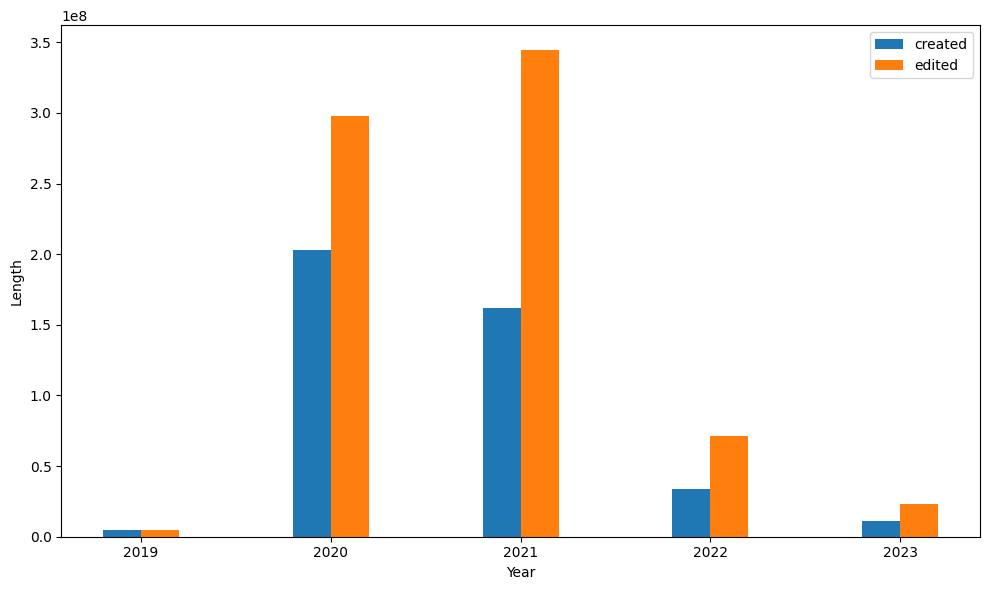

In [199]:
pl1 = BarPlotter(df_all_ai_roads_created_country.loc[df_all_ai_roads_created_country["country"] == "USA", :], df_all_ai_roads_edited_country.loc[df_all_ai_roads_edited_country["country"] == "USA", :],
                 x_column="year", y_column="sum(length)")
pl1.create_bar_plot(title=None, xlabel="Year", ylabel="Length")


# This chapter is useless so far

## Convert to Pandas DataFrame - AI buildings, AI roads (this chapter is useless so far)

In [ ]:
# # Filter AI blds
# df_blds = df.filter(df.tags_str.contains("microsoft/BuildingFootprints") | df.tags_str.contains("esri/Google_Africa_Buildings"))\
# .groupby("country", "editor", "year", "tags_str")\
# .agg(psf.sum("user_id"))\
# .withColumnRenamed("sum(user_id)", "count_u_id")\
# .sort(psf.col("count_u_id").desc())\
# .toPandas()


In [ ]:
# df_blds

,country,editor,year,tags_str,count_u_id
0,TUR,RapiD 1.1.9-tm.1,2023,"{building -> yes, source -> microsoft/Building...",1862607831910
1,IND,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",697575610154
2,IDN,JOSM/1.5 (18583 en),2023,"{building -> yes, source -> microsoft/Building...",167757823842
3,USA,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",116856923771
4,SYR,RapiD 1.1.9-tm.1,2023,"{building -> yes, source -> microsoft/Building...",97647827025
...,...,...,...,...,...
24984,GBR,StreetComplete 50.2,2023,"{building -> house, source -> microsoft/Buildi...",7329
24985,GBR,StreetComplete 50.2,2023,"{building -> detached, source -> microsoft/Bui...",7329
24986,GBR,StreetComplete 50.2,2023,"{building -> apartments, source -> microsoft/B...",7329
24987,GBR,RapiD 1.1.9,2023,"{building -> yes, source -> microsoft/Building...",7329


In [ ]:
# df_blds.notna().all(axis=1)


0        True
1        True
2        True
3        True
4        True
         ... 
24984    True
24985    True
24986    True
24987    True
24988    True
Length: 24989, dtype: bool

In [ ]:
# & (psf.col("road") == 1)


In [ ]:
# # Filter AI roads
# df_roads = df_roads.filter(((df_roads.tags_str.contains("mapwithai") | df_roads.tags_str.contains("MapWithAI") | df_roads.tags_str.contains("#nsroadimport")) & (df_roads.tags_str.contains("highway")))
#                            | (df_roads.hashtags_un.contains("#mapwithai") | df_roads.hashtags_un.contains("#nsroadimport")))\
#     .groupby("country", "editor", "year", "tags_str", "hashtags_un", "length")\
#     .agg(psf.sum("country"))\
#     .withColumnRenamed("sum(country)", "count_country")\
#     .sort(psf.col("count_country").desc())\
#     .toPandas()


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "c:\Users\milan\general_py_venv\lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "c:\Users\milan\general_py_venv\lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "C:\Users\milan\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# df_roads


,country,editor,year,tags_str,hashtags_un,length,count_osm_id
0,TZA,JOSM/1.5 (18646 en),2023,{},"#Tanzania,#mapwithai",0,3883303105856
1,TZA,JOSM/1.5 (18583 en),2023,{},"#Tanzania,#mapwithai",0,2204724899226
2,IND,RapiD 1.1.9-tm.1,2023,{},"#India,#mapwithai",0,1786006015589
3,IND,JOSM/1.5 (18427 en),2023,{},"#India,#mapwithai",0,1006969338360
4,TZA,JOSM/1.5 (18463 en),2023,{},"#Tanzania,#mapwithai",0,841542487332
...,...,...,...,...,...,...,...
82556,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",329,13331490
82557,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",340,13303745
82558,USA,JOSM/1.5 (18700 en),2023,"{highway -> residential, tiger:county -> Orang...","#buildingmapping,#mapwithai",399,13303745
82559,USA,JOSM/1.5 (18565 en),2023,"{highway -> tertiary, tiger:county -> Orange, ...","#buildingmapping,#mapwithai",697,13300336
